# Data mining assignment 3
* Michał Wiliński (151938) *

## First, I will inspect the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_data = pd.read_csv('data/data.csv')
# do not truncate the output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,5,13,6,6,-0.469819,0.358126,1.068105,-0.559650,-0.366905,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,4,6,16,9,0.591035,-0.396915,0.145834,-0.030798,0.471167,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,8,9,3,11,-0.679875,0.469326,0.349843,-0.288042,0.291470,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,8,9,6,4,-0.389456,0.626762,-1.074543,-1.521753,-1.150806,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,3,1,13,11,-0.120743,-0.615578,-1.064359,0.444142,0.428327,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


As visible - columns f_07 to f_13 are categorical ordered features, the rest is numerical. 

In [4]:
df_data.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,8.057878,8.084990,7.076388,6.286102,0.003413,-0.002639,0.005404,0.001656,-0.005399,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,4.700226,4.197106,4.433308,4.120077,0.998940,1.001096,1.003277,1.001258,0.995965,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.377021,-4.535903,-4.182233,-4.468930,-4.149688,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,-0.671810,-0.677757,-0.671055,-0.672635,-0.680243,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,7.000000,8.000000,6.000000,6.000000,0.003536,-0.004299,0.006535,0.001663,-0.001574,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,11.000000,11.000000,10.000000,9.000000,0.678679,0.673859,0.680903,0.673174,0.666996,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,36.000000,28.000000,38.000000,30.000000,4.490521,4.270708,4.157538,4.230849,4.710316,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [2]:
print(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06'] + [f'f_{i}' for i in range(14, 29)])

['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']


Now, we should check the distributions of features

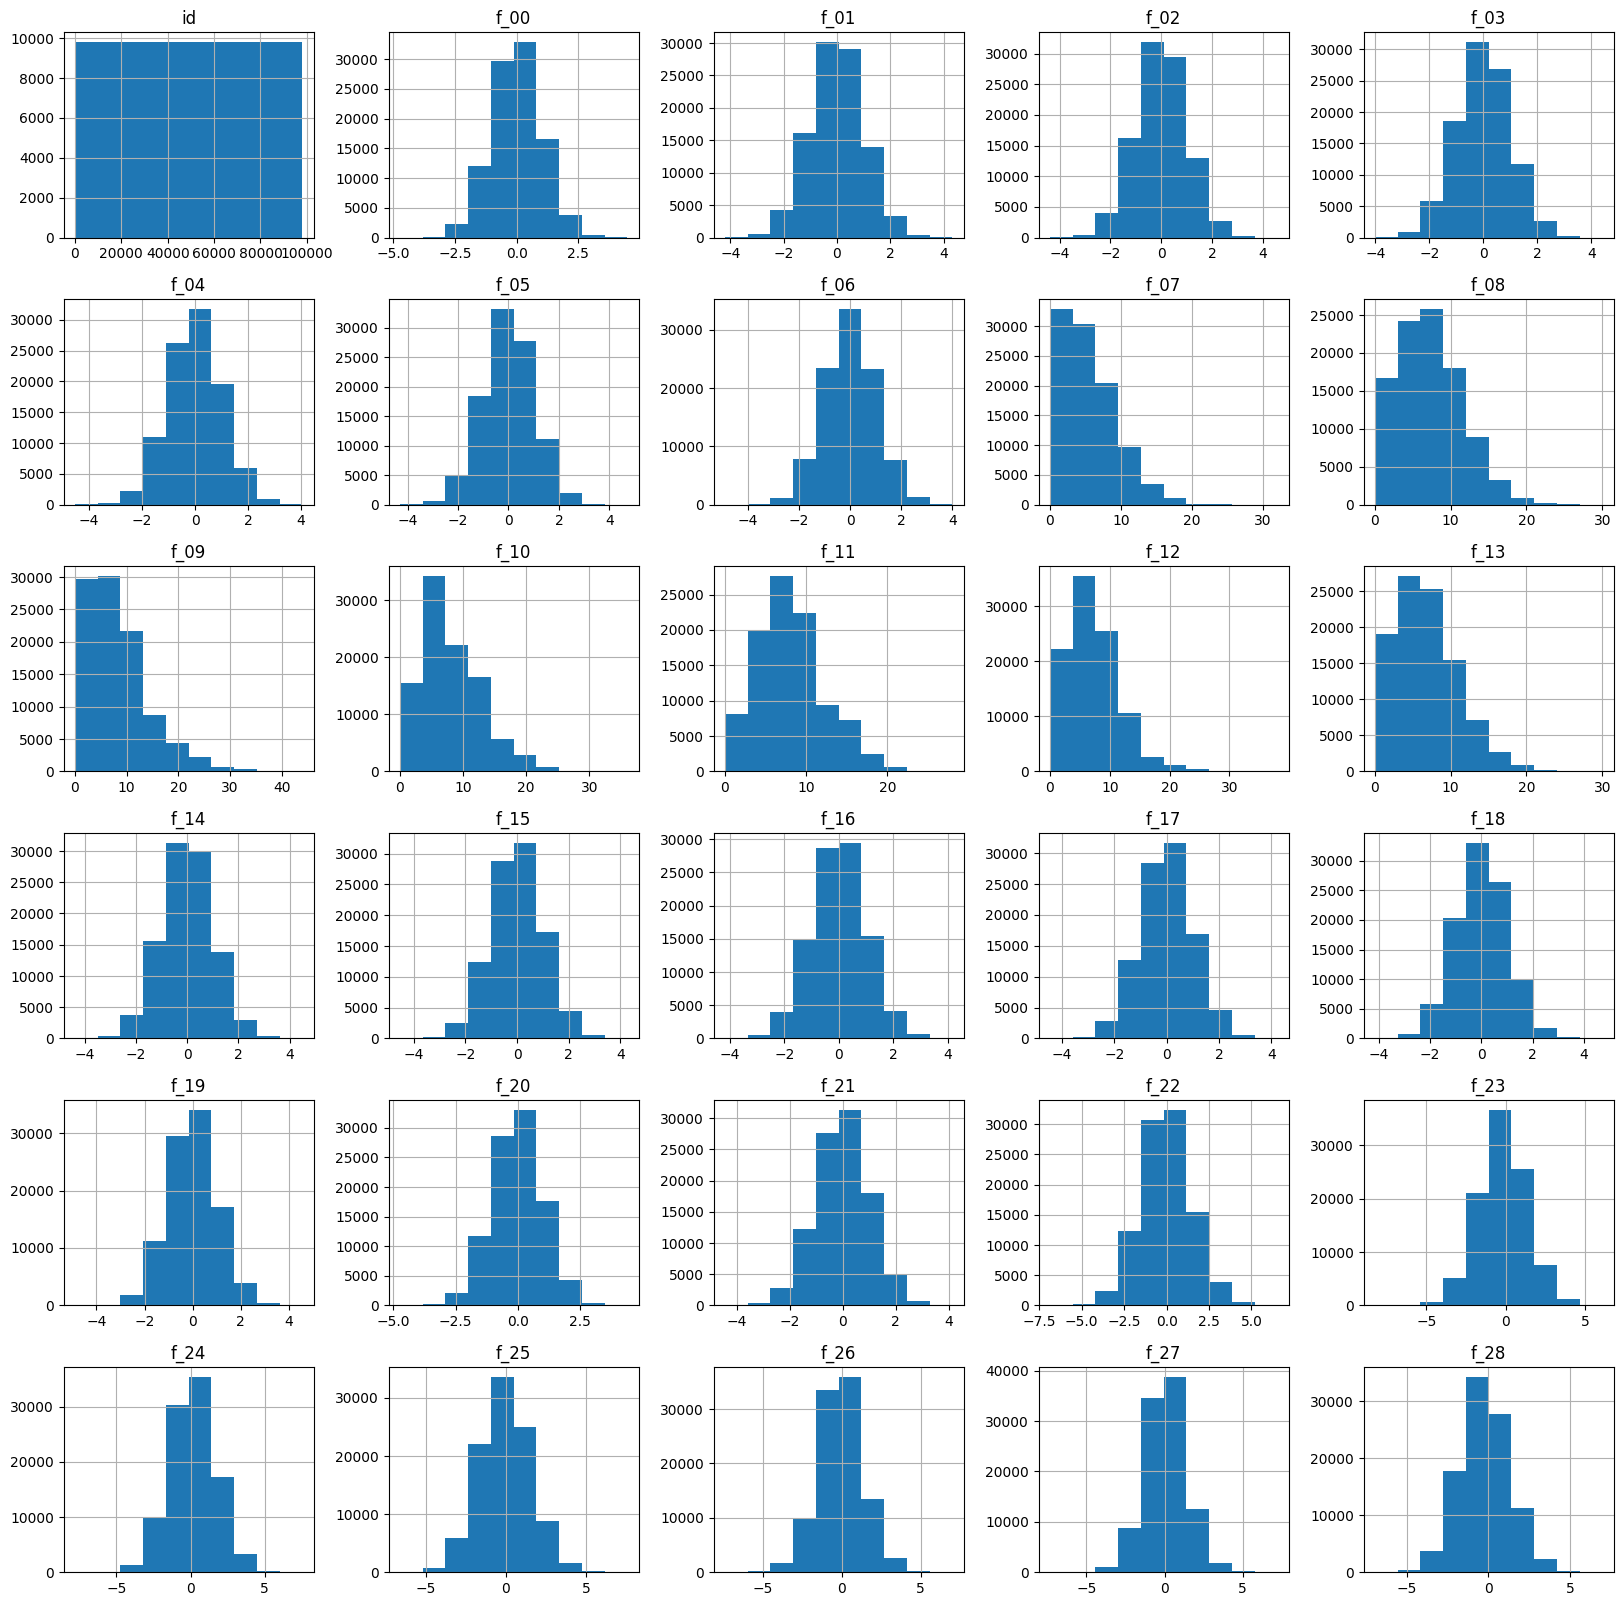

In [5]:
df_data.hist(figsize=(20, 20))

Most of the features are normally distributed, but we also have some skewed features. We will have to deal with them later.

<AxesSubplot: >

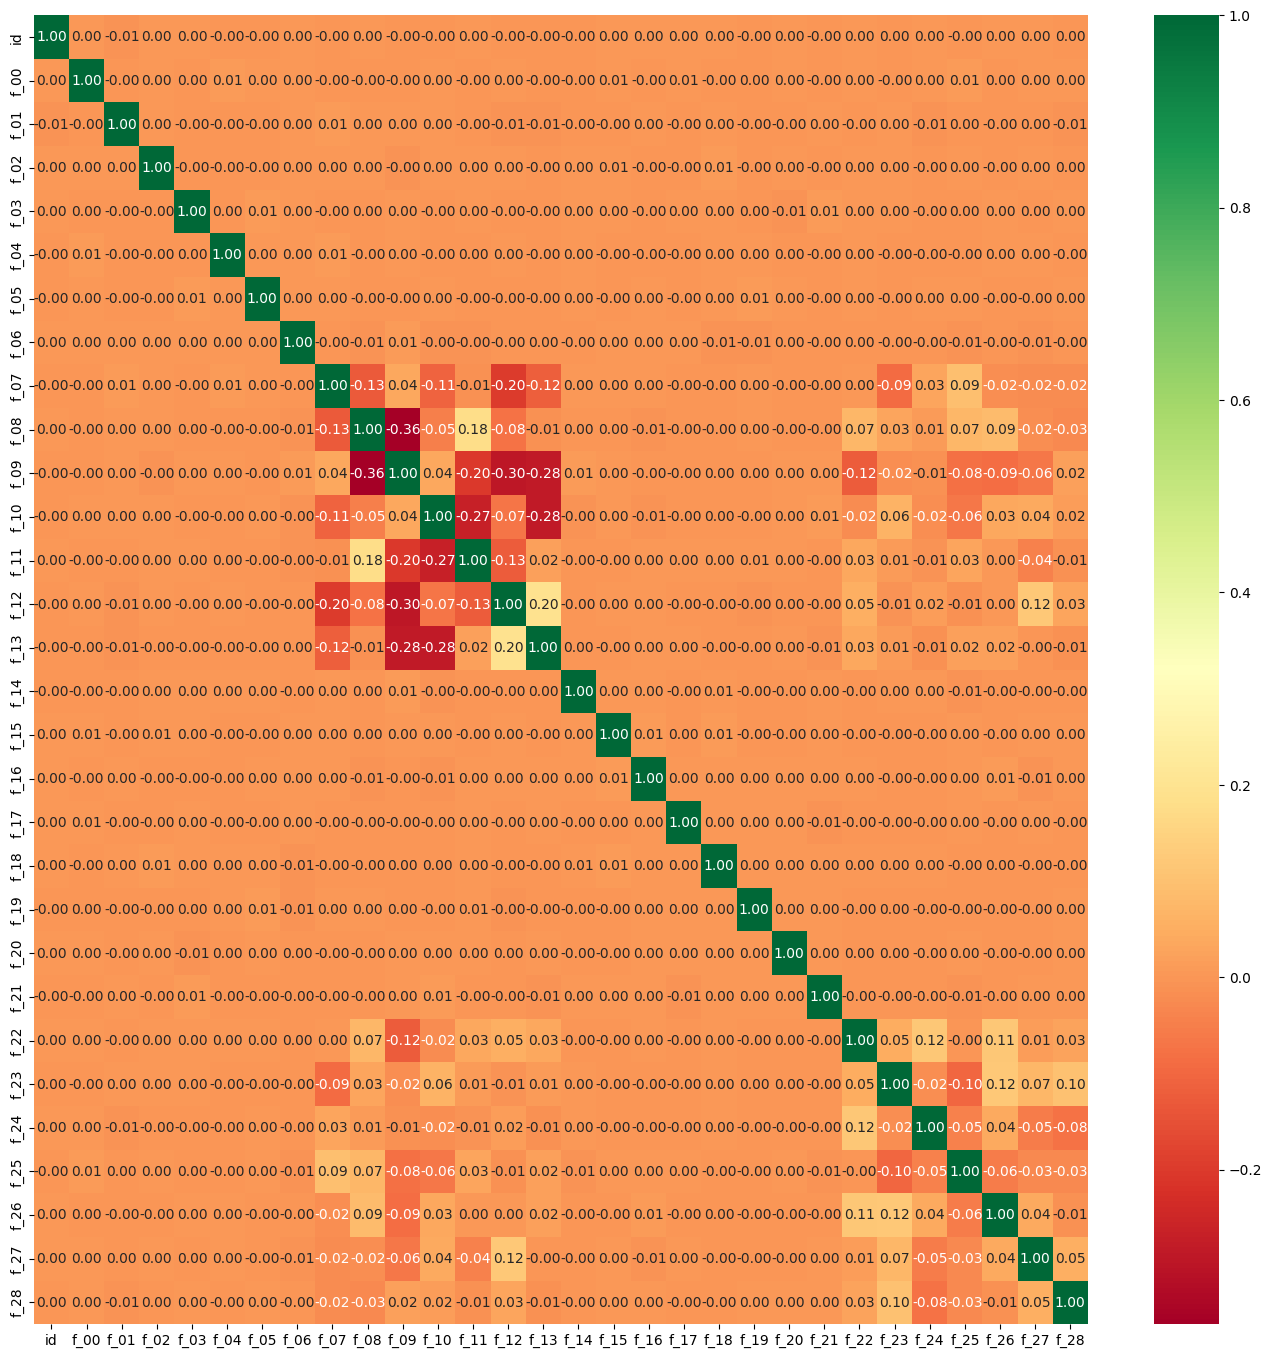

In [11]:
plt.figure(figsize=(17, 17))
sns.heatmap(df_data.corr(), annot=True, fmt='.2f', cmap='RdYlGn')

A negtive correlation is observed in pair f_09, f_08. Summing up the quick overview of the dataset, we can say that we have 2 group of attributes to deal with in the normalization schema proposal:
 - categorical ordered features whicha are skewed
 - normally distributed numerical features

## Normalization schema proposal
For categorical ordered features, the best is to leave them, but I want to experiment with Box-Cox transformation for numerical features. I will use the following formula:
$$
x_i^{(\lambda)} = \begin{cases}
\frac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\ln(x_i) & \text{if } \lambda = 0
\end{cases}
$$
The real valued, normally distributed features will be transformed using standard scaler, making them have mean 0 and variance 1.

In [ ]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

skewedcat = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']
realvnrom = ['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06'] + [f'f_{i}' for i in range(14, 29)]

def schema1(data):
    """
        # SCHEMA 1  # standard on normal real valued, minmax on categorical
    """

    # Initialize the scalers
    std_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    # Apply standardization on normally distributed features
    data[realvnrom] = std_scaler.fit_transform(data[realvnrom])

    # Apply Min-Max scaling on categorical features
    data[skewedcat] = minmax_scaler.fit_transform(data[skewedcat])

    return data

def schema2(data):
    """
        # SCHEMA 2  # standard on normal real valued, boxcox on skewed categorical
    """

    # Initialize the scalers
    std_scaler = StandardScaler()

    # Apply standardization on normally distributed features
    data[realvnrom] = std_scaler.fit_transform(data[realvnrom])

    # Apply boxcox scaling on categorical features
    data[skewedcat] = boxcox(1 + data[skewedcat])[0]

    return data

def schema3(data):
    """
        # SCHEMA 3  # minmax on normal real valued, standard on skewed categorical
    """

    # Initialize the scalers
    minmax_scaler = MinMaxScaler()
    std_scaler = StandardScaler()

    # Apply Min-Max scaling on normally distributed features
    data[realvnrom] = minmax_scaler.fit_transform(data[realvnrom])

    # Apply standardization on categorical features
    data[skewedcat] = std_scaler.fit_transform(data[skewedcat])

    return data

df_data = schema1(df_data)

df_data.to_csv('data/data_normalized.csv', index=False)
plot = df_data.hist(figsize=(20, 20))
plot.savefig('plots/data_normalized.png')

## Dimensionality reduction

I will use PCA to reduce the dimensionality of the dataset.